In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

55314
       season   club_id  league_id  dynamic_payment_segment  cohort_season  \
54456     173   9401374    2911294                        3             30   
8522      173  14172517    2911214                        2              2   
26774     173  13745598    2908717                        0              5   
4443      173   6039611    2912869                        3            139   
11764     173  14152502    2908432                        2              2   
...       ...       ...        ...                      ...            ...   
44732     173  14393830    2908005                        2              1   
54343     173  14262408    2907185                        2              2   
38158     173  13417489    2912257                        0              6   
860       173  14322502    2906804                        2              2   
15795     173   9057281    2911384                        2             32   

       avg_age_top_11_players  avg_stars_top_11_players  

NameError: name 'sklearn' is not defined

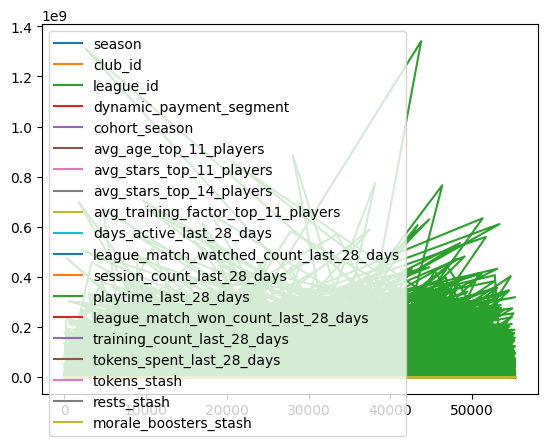

In [5]:
data = pd.read_csv('jobfair_train.csv')
print(len(data))
data['dynamic_payment_segment'] = pd.factorize(data['dynamic_payment_segment'])[0]
list_drop = ['registration_country', 'registration_platform_specific', 'global_competition_level']
data.drop(list_drop, axis=1, inplace=True)
#tr_data = tr_data.apply(pd.to_numeric, errors='coerce')
#tr_data = tr_data.dropna()
data_x = data.iloc[:, 0:-1]
data_y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=42)
print(X_train)
X_train.plot()
sklearn.feature_selection.f_classif(X_train, y_train)
print(X_train)

In [6]:
gnb = GaussianNB()

In [7]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [8]:
print(y_pred)

[14 14 14 ...  6 14 14]


In [11]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 18254 points : 16267


In [15]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.predict(X_test))

[14 14 14 ...  1 10 14]


In [18]:
print(clf.score(X_test, y_test, sample_weight=None))

0.1447354004601731
